In [1]:
#导入数据集
import pandas as pd
data = pd.read_csv('wisc_bc_data.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
data.shape

(569, 32)

In [4]:
data.info()#查询样本数据相关信息

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [2]:
#id对是否患乳腺癌无关，删除此属性
data1 = data.drop(['id'],axis = 1)

In [3]:
#diagnosis为目标变量，M表示恶性，B表示良性,观察其在数据集中的分布情况

print(data1.diagnosis.value_counts())
print(data1.diagnosis.value_counts()/len(data1.diagnosis))#输出不同类的占比

B    357
M    212
Name: diagnosis, dtype: int64
B    0.627417
M    0.372583
Name: diagnosis, dtype: float64


In [4]:
#将字符串格式转化为整数编码
diagnosis_dict = {'M':1,'B':0}
data1.diagnosis = data1.diagnosis.map(diagnosis_dict)

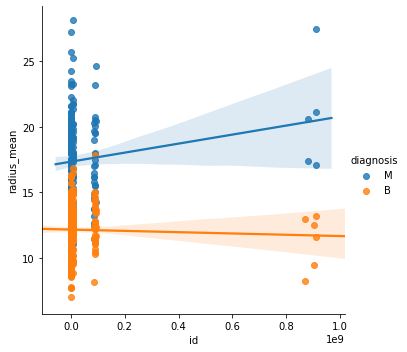

In [6]:
import seaborn as sns
sns.lmplot(x = 'id',y = 'radius_mean',hue = 'diagnosis',data = data)#通过hue参数制定第二个分组特征

In [7]:
#定义因变量和自变量
Y = data1.diagnosis
X = data1.drop(['diagnosis'],axis = 1)

In [8]:
data1.corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


# 先标准化，后降维

In [14]:
# 数据标准化
from sklearn.preprocessing import StandardScaler
mod = StandardScaler().fit(X)#数据集训练

X_z = mod.transform(X)#转换
pd.DataFrame(X_z,columns = X.columns)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


In [38]:
from sklearn.preprocessing import MinMaxScaler

mod1 = MinMaxScaler().fit(X)

X_m = mod1.transform(X)

In [59]:
#LDA降维
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
mod_1 = LinearDiscriminantAnalysis(solver ='eigen',n_components=1)


#import warnings
#warnings.filterwarnings("ignore")#忽略警告

mod_1.fit(X_z,Y)
X_lda = mod_1.transform(X_z)

In [60]:
#拆分数据集
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_lda,Y,test_size=0.2,random_state = 0)

#逻辑回归预测二分类
from sklearn.linear_model import LogisticRegression

mod_11 = LogisticRegression(random_state=10).fit(x_train,y_train)

y_pred = mod_11.predict(x_test)

In [64]:
#模型评估
from sklearn.metrics import classification_report,accuracy_score

print("预测效果",mod_11.score(x_test,y_test))

print(classification_report(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))
print(accuracy_score(y_pred,y_test))

预测效果 0.9736842105263158
              precision    recall  f1-score   support

           0       0.99      0.97      0.98        68
           1       0.96      0.98      0.97        46

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

[[66  2]
 [ 1 45]]
0.9736842105263158


# LDA降维

In [9]:
#LDA降维
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

model = LinearDiscriminantAnalysis(solver ='eigen',n_components=1)

model.fit(X,Y)
X_new = model.transform(X)

In [16]:
#拆分数据集
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_new,Y,test_size=0.3,random_state = 0)

In [17]:
#观察测试集和训练集中恶性样本和良性样本分布是否接近：
print (y_train.value_counts()/len(y_train))
print (y_test.value_counts()/len(y_test))

0    0.625628
1    0.374372
Name: diagnosis, dtype: float64
0    0.631579
1    0.368421
Name: diagnosis, dtype: float64


In [21]:
#逻辑回归预测二分类
from sklearn.linear_model import LogisticRegression

model_1 = LogisticRegression(solver='liblinear').fit(x_train,y_train.values.ravel())

print(model_1)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)


In [20]:
#逻辑回归模型评估
from sklearn.metrics import classification_report,confusion_matrix

y_pred1 = model_1.predict(x_test)
print("模型预测效果：",model_1.score(x_test,y_test))

print(classification_report(y_pred1,y_test))

confusion_matrix(y_pred1,y_test)

预测效果 0.9824561403508771
              precision    recall  f1-score   support

           0       1.00      0.97      0.99       111
           1       0.95      1.00      0.98        60

    accuracy                           0.98       171
   macro avg       0.98      0.99      0.98       171
weighted avg       0.98      0.98      0.98       171



array([[108,   3],
       [  0,  60]], dtype=int64)

In [22]:
#K近邻预测分类
from sklearn.neighbors import KNeighborsClassifier
model_2 = KNeighborsClassifier(n_neighbors=10).fit(x_train,y_train)

print(model_2)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')


In [23]:
#K近邻模型评估
from sklearn.metrics import classification_report,confusion_matrix

y_pred2 = model_2.predict(x_test)

print("模型预测效果：",model_2.score(x_test,y_test))

print(classification_report(y_pred2,y_test))

confusion_matrix(y_pred2,y_test)

模型预测效果： 0.9766081871345029
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       110
           1       0.95      0.98      0.97        61

    accuracy                           0.98       171
   macro avg       0.97      0.98      0.97       171
weighted avg       0.98      0.98      0.98       171



array([[107,   3],
       [  1,  60]], dtype=int64)

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,accuracy_score


## 建模并评估
keys = []
scores = []
models = {'逻辑回归': LogisticRegression(solver='liblinear'),
          '线性支持向量机': LinearSVC(),
          '决策树': DecisionTreeClassifier(),
          '随机森林':RandomForestClassifier(n_estimators=15),
          'k近邻':KNeighborsClassifier(n_neighbors=20)}

for k,v in models.items():
    mod = v
    mod.fit(x_train, y_train.values.ravel())
    pred = mod.predict(x_test)
    print(str(k) + '建模效果：' + '\n')
    print(classification_report(y_test, pred))
    acc = accuracy_score(y_test, pred)
    print('分类正确率：'+ str(acc))
    print('模型预测效果：'+str(mod.score(x_test,y_test)))
    print('\n' + '\n')
    keys.append(k)
    scores.append(acc)
    table = pd.DataFrame({'model':keys, 'accuracy score':scores})

table

逻辑回归建模效果：

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        67
           1       1.00      0.96      0.98        47

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

分类正确率：0.9824561403508771
模型预测效果：0.9824561403508771



线性支持向量机建模效果：

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        67
           1       1.00      0.96      0.98        47

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

分类正确率：0.9824561403508771
模型预测效果：0.9824561403508771



决策树建模效果：

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        67
           1       0.98      0.96      0.97        47

    accuracy                           

D:\Users\xyf\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


,model,accuracy score
0,逻辑回归,0.982456
1,线性支持向量机,0.982456
2,决策树,0.973684
3,随机森林,0.973684
4,k近邻,0.973684


## RFE

In [52]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier

rfe = RFE(DecisionTreeClassifier(random_state=10),n_features_to_select=10)
rfe.fit_transform(X,Y)

print(rfe.score(X,Y))

print(pd.Series(rfe.support_,index=X.columns))

print(rfe.ranking_)

columns = X.columns[rfe.support_]

rfe_X = X[columns]

1.0
id                         False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean         True
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                     True
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst                True
texture_worst               True
perimeter_worst             True
area_worst                  True
smoothness_worst            True
compactness_worst           True
concavity_worst             True
concave points_worst        True
symmetry_worst             False
fracta

In [66]:
#拆分数据集
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(rfe_X,Y,test_size=0.2,random_state = 0)

from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=10)
clf.fit(train_x,train_y)

pred = clf.predict(test_x)
print("模型预测效果：",clf.score(test_x,test_y))
print(classification_report(pred,test_y))
print(confusion_matrix(pred,test_y))

模型预测效果： 0.9122807017543859
              precision    recall  f1-score   support

           0       0.90      0.95      0.92        63
           1       0.94      0.86      0.90        51

    accuracy                           0.91       114
   macro avg       0.92      0.91      0.91       114
weighted avg       0.91      0.91      0.91       114

[[60  3]
 [ 7 44]]
